In [4]:
!pip install pandas --quiet
!pip install matplotlib --quiet
!pip install cartopy --quiet


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


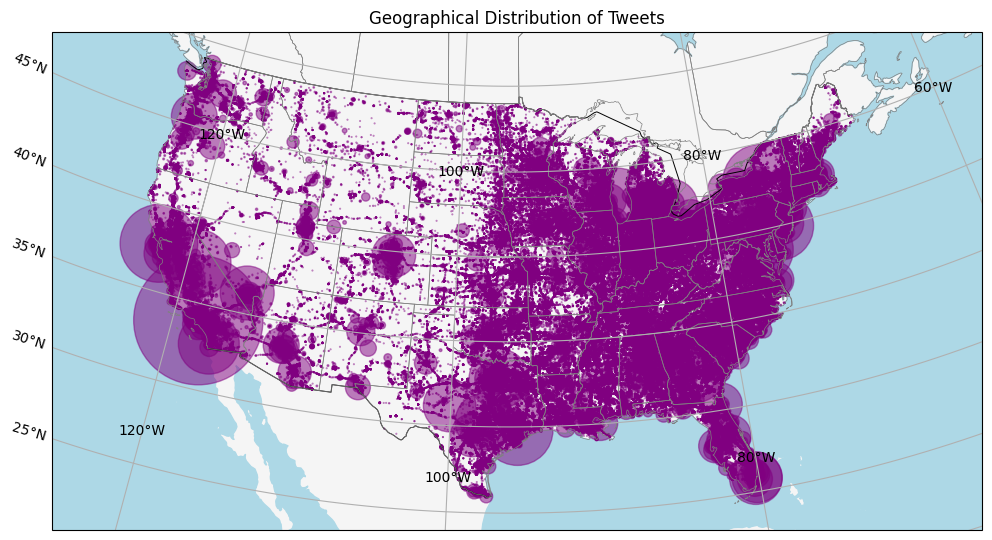

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 1) Load and clean your tweet data
df = pd.read_csv("Q3_location_counts.csv")
df = df[df['location'].str.lower() != 'location']  # remove any duplicate header row

df[['longitude', 'latitude']] = df['location'].str.split(',', expand=True)
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['latitude']  = pd.to_numeric(df['latitude'], errors='coerce')
df['count']     = pd.to_numeric(df['count'], errors='coerce')
df.dropna(subset=['longitude','latitude','count'], inplace=True)

# 2) Create a figure with a bigger size
fig = plt.figure(figsize=(12, 8))

# Use the Lambert Conformal projection for the continental US
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=-96, central_latitude=37))

# 3) Set an extent that focuses on the continental US
ax.set_extent([-125, -66, 24, 50], crs=ccrs.PlateCarree())

# 4) Add land/ocean background and state/country borders
ax.add_feature(cfeature.LAND.with_scale('50m'), color='whitesmoke')
ax.add_feature(cfeature.OCEAN.with_scale('50m'), color='lightblue')
ax.add_feature(cfeature.BORDERS.with_scale('50m'), edgecolor='black', linewidth=0.7)
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='gray', linewidth=0.5)

# 5) Plot your data
#   - Increase the bubble size scale, e.g. 0.25
#   - Use alpha=0.5 for partial transparency
#   - transform=ccrs.PlateCarree() indicates lat/lon coords
plt.scatter(
    df['longitude'],
    df['latitude'],
    s=df['count'] * 0.25,  # increase scale for larger bubbles
    c='purple',
    alpha=0.5,
    transform=ccrs.PlateCarree()
)

# 6) Title, gridlines, etc.
plt.title("Geographical Distribution of Tweets")
gridlines = ax.gridlines(draw_labels=True)
gridlines.right_labels = False  # optionally turn off right labels
gridlines.top_labels = False    # optionally turn off top labels

plt.show()

Question 4

Aggregated tweet counts by time_of_day:
  time_of_day    count
0     Evening  3156329
1     Morning  2123326
2   Afternoon  2415578
3       Night  2310068


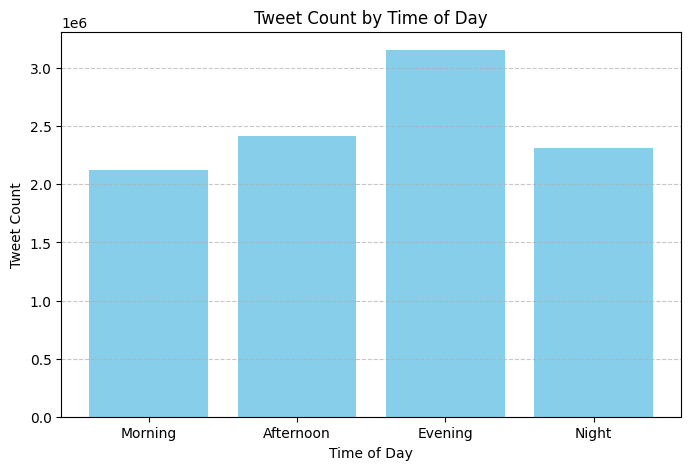

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged Q4 CSV file that you downloaded and renamed as:
# "task4_q4_time_of_day_distribution.csv"
df = pd.read_csv("task4_q4_time_of_day_distribution.csv")

# Preview the data to verify structure (should have columns: time_of_day, count)
print("Aggregated tweet counts by time_of_day:")
print(df.head())

# Convert the 'count' column to numeric (if not already)
df['count'] = pd.to_numeric(df['count'], errors='coerce')

# Define the desired categorical order for time_of_day
# (as per the instructions, we want: Morning (5AM-11AM), Afternoon (12PM-4PM),
#  Evening (5PM-9PM), and Night (10PM-4AM))
desired_order = ["Morning", "Afternoon", "Evening", "Night"]
df['time_of_day'] = pd.Categorical(df['time_of_day'], categories=desired_order, ordered=True)

# Sort the DataFrame by the new categorical column order
df = df.sort_values('time_of_day')

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(df['time_of_day'], df['count'], color='skyblue')
plt.xlabel("Time of Day")
plt.ylabel("Tweet Count")
plt.title("Tweet Count by Time of Day")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Aggregated tweet counts by day of the week:
    day_name    count  percentage
0  Wednesday  2063202   20.621089
1    Tuesday  2013315   20.122483
2     Friday  1902774   19.017659
3   Thursday  2003562   20.025005
4     Monday  2022448   20.213765


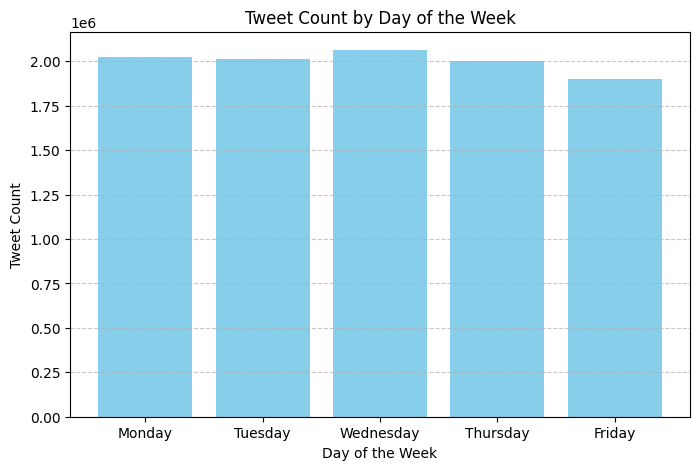

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the aggregated CSV output for Question 5.
# Make sure the file "task5_q5_day_of_week_distribution.csv" is in your current directory.
df = pd.read_csv("task5_q5_day_of_week_distribution.csv")

# Print a preview of the data
print("Aggregated tweet counts by day of the week:")
print(df.head())

# Define the desired order of the days of the week.
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

# Convert the 'day_name' column to a categorical type with the specified order,
# then sort the DataFrame by 'day_name'
df['day_name'] = pd.Categorical(df['day_name'], categories=ordered_days, ordered=True)
df = df.sort_values('day_name')

# Create a bar chart of tweet counts by day of the week
plt.figure(figsize=(8, 5))
plt.bar(df['day_name'], df['count'], color='skyblue')
plt.xlabel("Day of the Week")
plt.ylabel("Tweet Count")
plt.title("Tweet Count by Day of the Week")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()